In [1]:
import pickle
import datetime

In [2]:
%matplotlib inline
%config InlineBackend.figure_formats = {'png','retina'}

In [3]:
with open('item37.p', 'rb') as f:
    item37 = pickle.load(f)

In [4]:
model2 = sm.OLS.from_formula("units ~  C(store_nbr) + scale(tmax) + scale(tmin) + scale(tavg) + scale(depart) + scale(dewpoint) + scale(wetbulb) + scale(preciptotal) + scale(stnpressure) + scale(sealevel) + scale(avgspeed) + scale(resultspeed) + C(TS) + C(GR) + C(RA) + C(DZ) + C(SN) + C(SG) + C(GS) + C(PL) + C(FG2) + C(FG) + C(BR) + C(UP) + C(HZ) + C(FU) + C(DU) + C(SQ) + C(FZ) + C(MI) + C(PR) + C(BC) + C(BL) + C(weekend) + 0" , data = item37)


result2 = model2.fit()
print(result2.summary())

                            OLS Regression Results                            
Dep. Variable:                  units   R-squared:                       0.625
Model:                            OLS   Adj. R-squared:                  0.622
Method:                 Least Squares   F-statistic:                     211.3
Date:                Wed, 04 Jul 2018   Prob (F-statistic):               0.00
Time:                        23:48:06   Log-Likelihood:                -16892.
No. Observations:                4223   AIC:                         3.385e+04
Df Residuals:                    4189   BIC:                         3.407e+04
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
C(store_nbr)[5]        9.0639      2

In [58]:
ols_colums = 'scale(tmax) + scale(tmin) + scale(tavg) + scale(depart) + scale(dewpoint) + scale(wetbulb) + scale(preciptotal) + scale(stnpressure) + scale(sealevel) + scale(avgspeed) + scale(resultspeed)'

ols_colums = ols_colums.split(' + ')

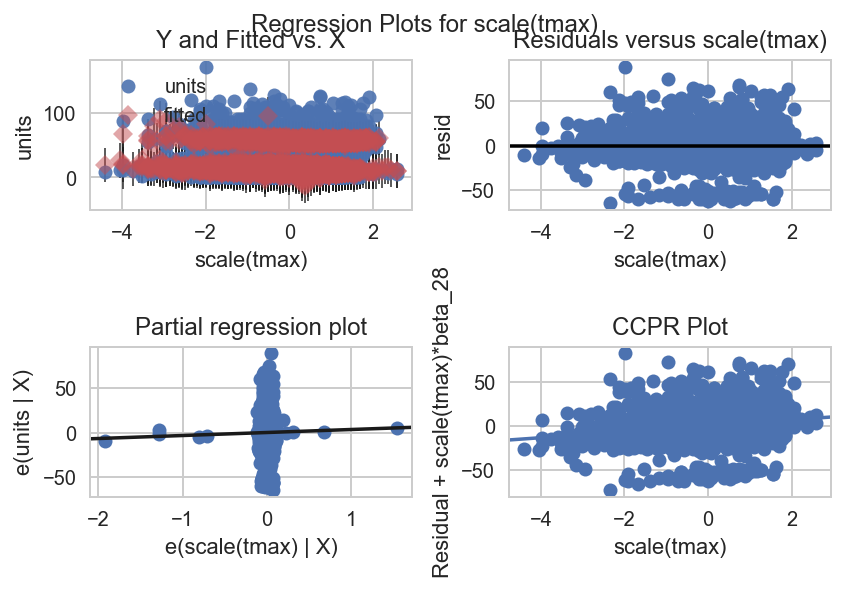

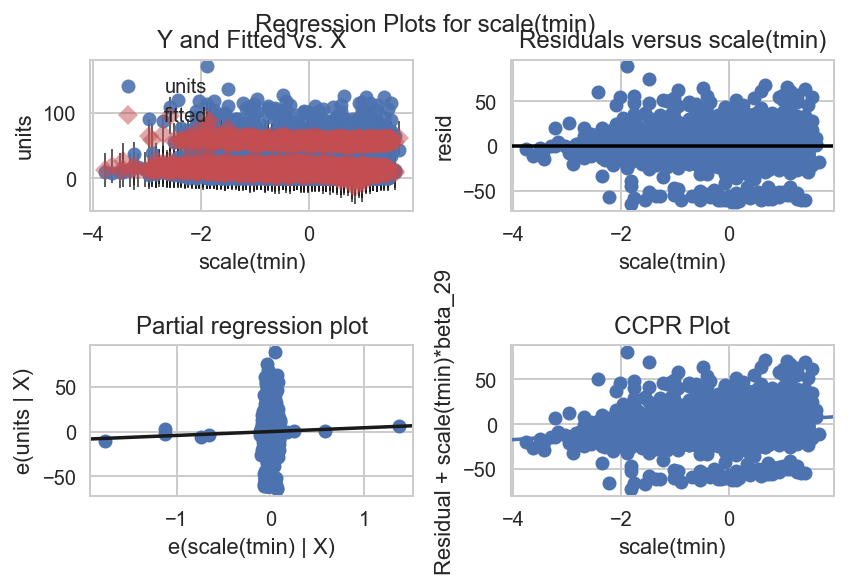

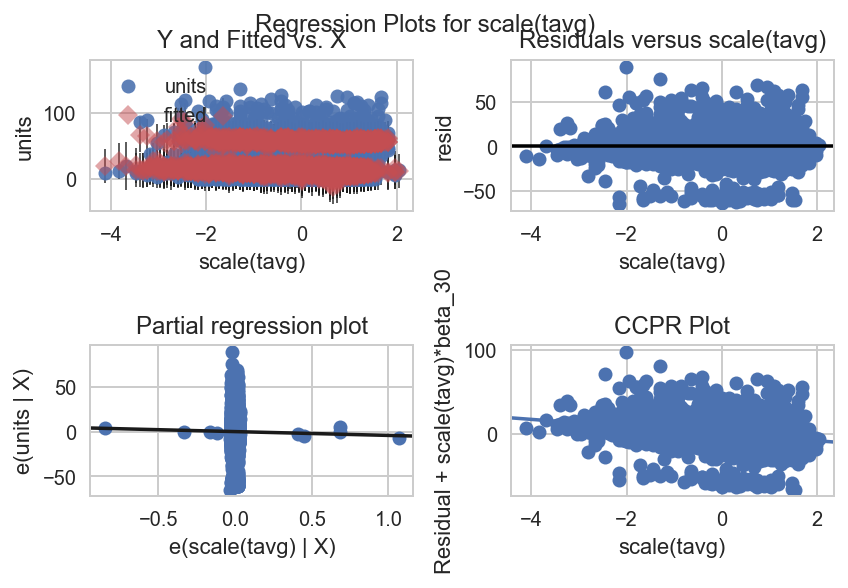

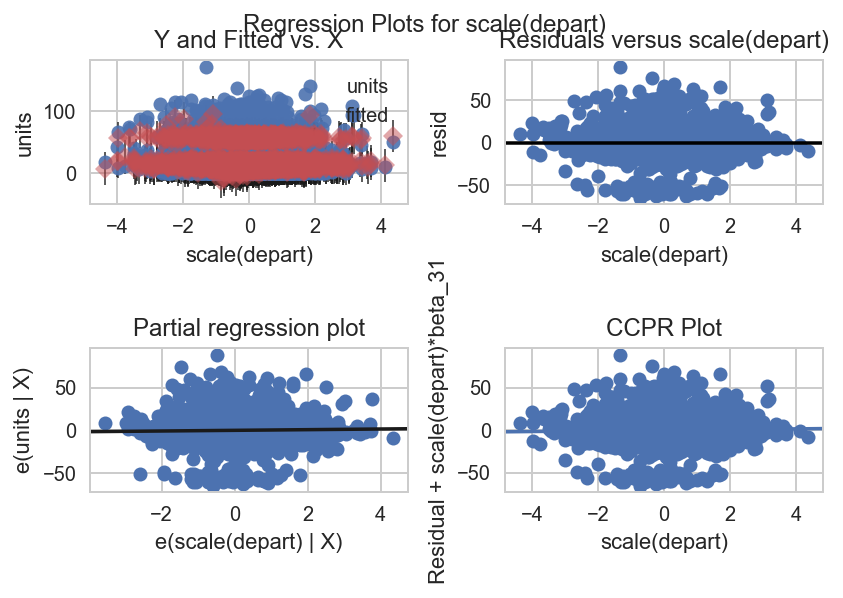

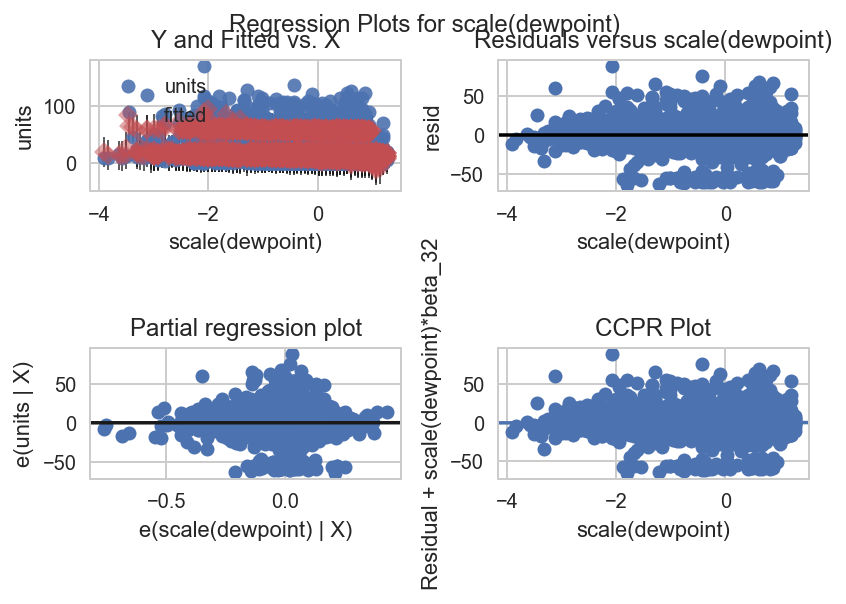

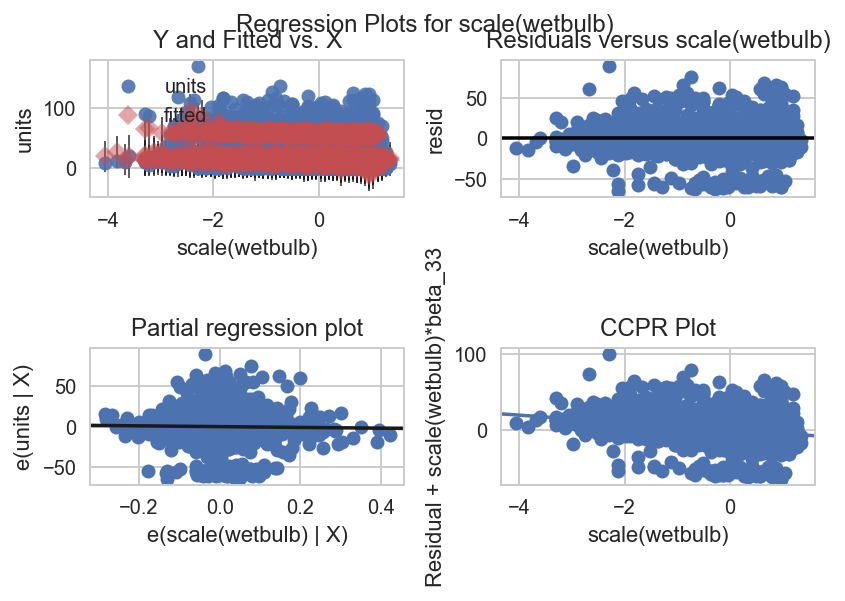

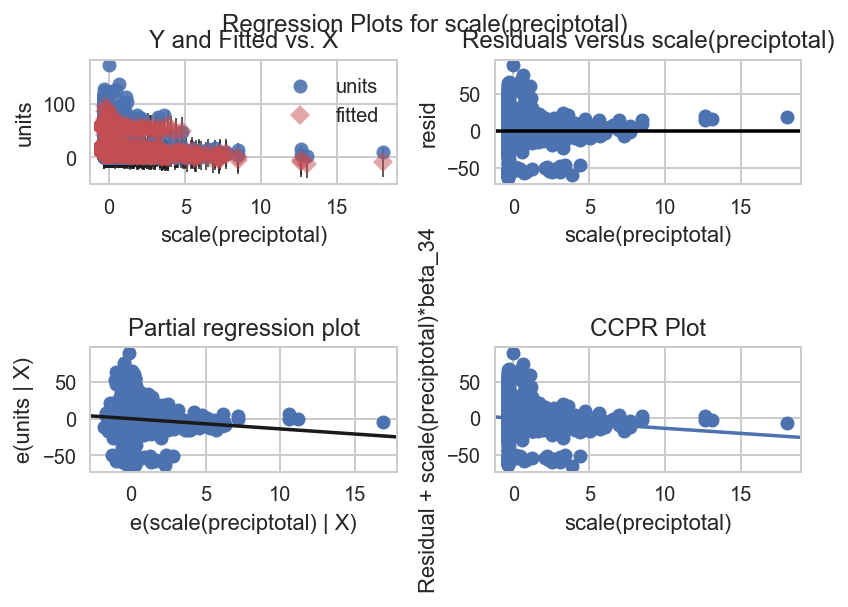

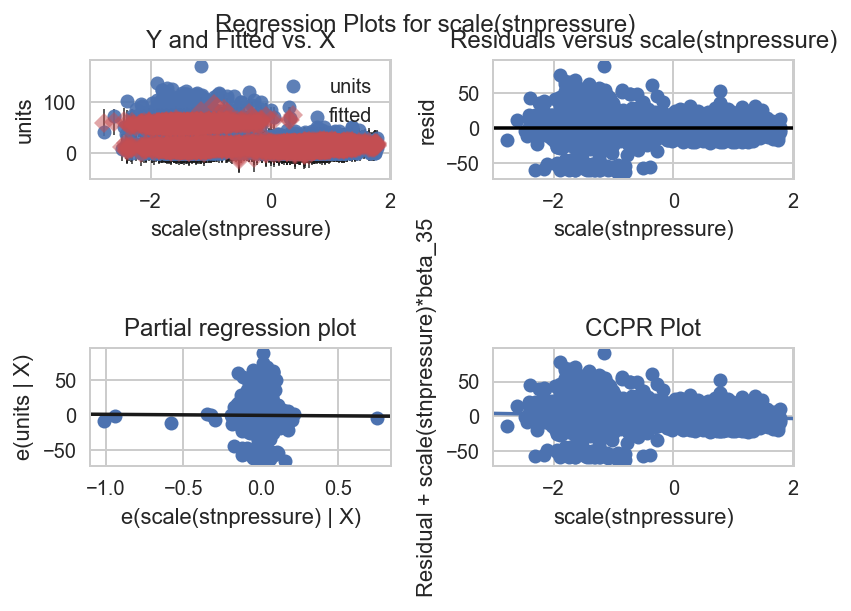

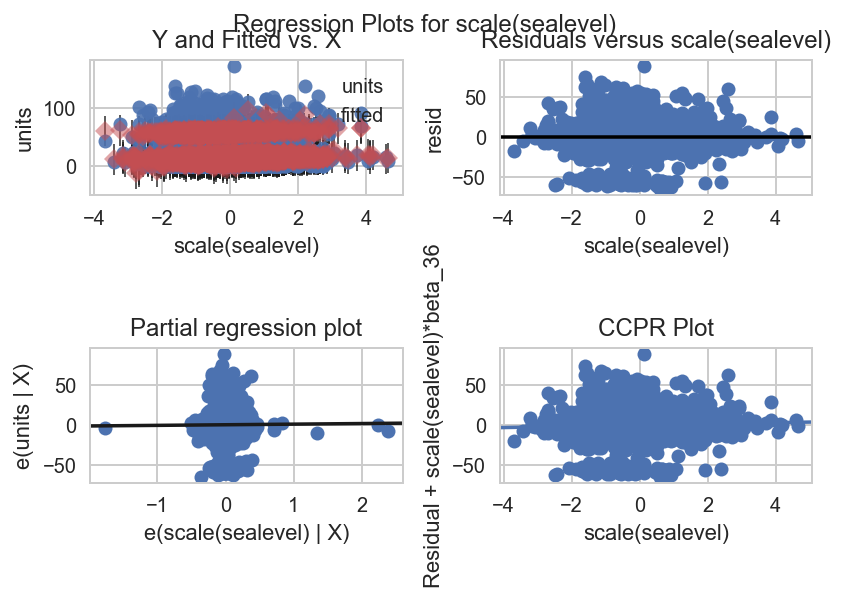

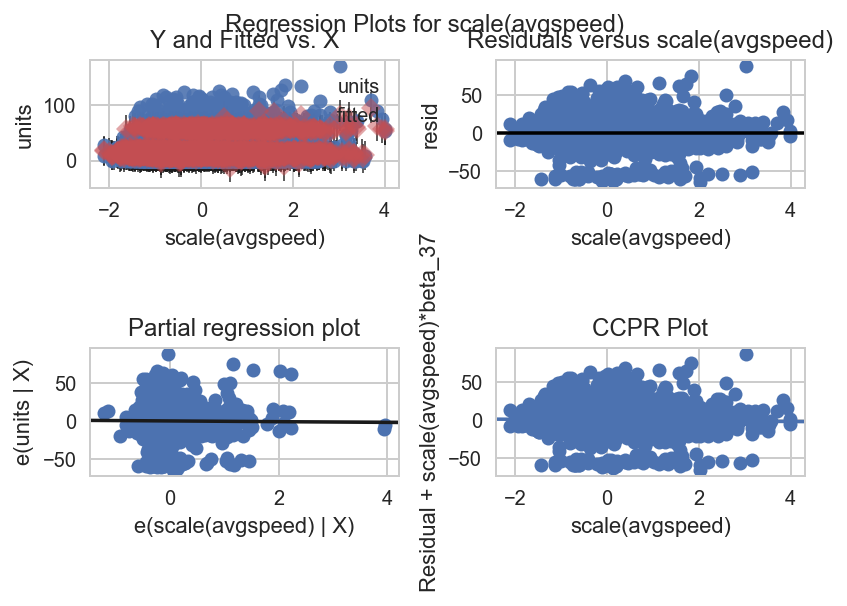

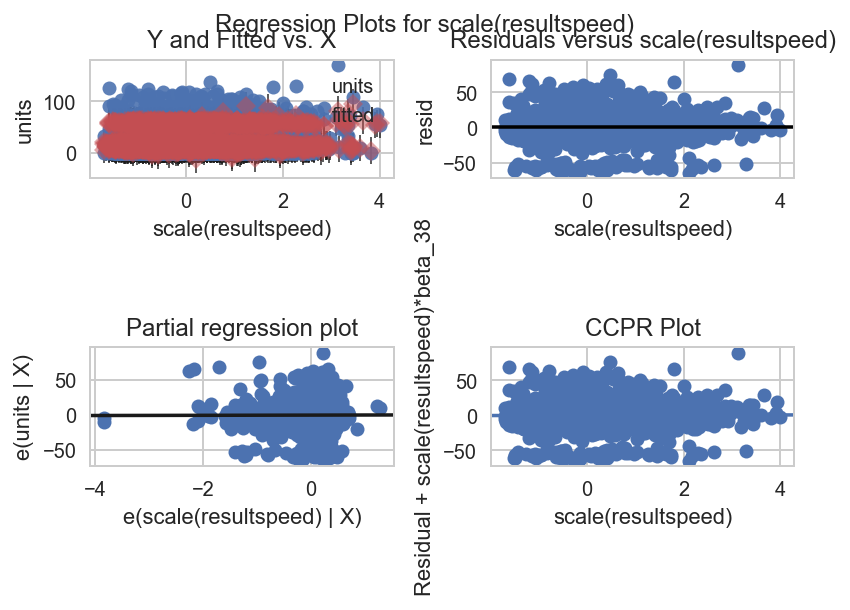

In [59]:
for column in ols_colums:
    fig = sm.graphics.plot_regress_exog(result2, column)
    plt.show()

In [8]:
model3 = sm.OLS.from_formula("units ~  C(store_nbr) + scale(tmax) + scale(tmin) + scale(tavg) + scale(depart) + scale(dewpoint) + scale(wetbulb) + scale(preciptotal) + scale(stnpressure) + scale(sealevel) + scale(avgspeed) + scale(resultspeed) + C(SN) + C(FG2) + C(FG) + C(FZ) + C(BL) + C(weekend) + 0" , data = item37)


result3 = model3.fit()
print(result3.summary())

                            OLS Regression Results                            
Dep. Variable:                  units   R-squared:                       0.624
Model:                            OLS   Adj. R-squared:                  0.622
Method:                 Least Squares   F-statistic:                     317.3
Date:                Thu, 05 Jul 2018   Prob (F-statistic):               0.00
Time:                        00:48:03   Log-Likelihood:                -16894.
No. Observations:                4223   AIC:                         3.383e+04
Df Residuals:                    4200   BIC:                         3.398e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
C(store_nbr)[5]        9.2326      2

In [44]:
model3 = sm.OLS.from_formula("units ~  C(store_nbr) + scale(dewpoint) + scale(preciptotal) + C(SN) + C(FG2) + C(FG) + C(FZ) + C(BL) + C(weekend) + 0" , data = item37_pca)


result3 = model3.fit()
print(result3.summary())

                            OLS Regression Results                            
Dep. Variable:                  units   R-squared:                       0.635
Model:                            OLS   Adj. R-squared:                  0.633
Method:                 Least Squares   F-statistic:                     546.9
Date:                Thu, 05 Jul 2018   Prob (F-statistic):               0.00
Time:                        01:02:54   Log-Likelihood:                -16418.
No. Observations:                4108   AIC:                         3.286e+04
Df Residuals:                    4094   BIC:                         3.295e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
C(store_nbr)[5]        8.1733      0

In [46]:
corrmat = item37.corr()

In [12]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(item37.iloc[:,4:8])

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [14]:
pca

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [16]:
Z = pca.transform(item37.iloc[:,4:8])

In [23]:
Z_df= pd.DataFrame(Z)
Z_df.columns = [ 'Z1' , 'Z2' ]

In [35]:
len(Z_df) , len(item37)

(4223, 4223)

In [37]:
item37_pca = pd.concat([item37, Z_df] , axis =1, join ='inner')

In [38]:
len(item37_pca)

4108

In [39]:
item37_pca.tail()

,date,store_nbr,item_nbr,station_nbr,tmax,tmin,tavg,depart,dewpoint,wetbulb,...,BC,BL,VC,units,week_day_name,day_of_year,year,weekend,Z1,Z2
4218,2014-10-05,17,37,20,86.0,61.0,74.0,2.33,56.0,63.0,...,False,False,False,63.0,Sunday,278,2014,True,1.303241,-0.278598
4219,2014-10-05,18,37,17,86.0,48.0,67.0,-0.50,49.0,56.0,...,False,False,False,0.0,Sunday,278,2014,True,1.461348,-1.685032
4220,2014-10-05,43,37,11,73.0,47.0,60.0,-12.00,46.0,53.0,...,False,False,False,12.0,Sunday,278,2014,True,10.625550,0.130977
4221,2014-10-06,5,37,12,78.0,53.0,66.0,-10.50,56.0,60.0,...,False,False,False,17.0,Monday,279,2014,True,16.778856,-2.357485
4222,2014-10-06,10,37,12,78.0,53.0,66.0,-8.40,56.0,60.0,...,False,False,False,21.0,Monday,279,2014,True,10.625550,0.130977


In [52]:
model4 = sm.OLS.from_formula("units ~  C(store_nbr) + scale(dewpoint) + I(scale(dewpoint)**2) + I(scale(dewpoint)**3) + I(scale(dewpoint)**4)+ scale(preciptotal) + C(SN) + C(FG2) + C(FG) + C(FZ) + C(BL) + C(weekend) + 0" , data = item37_pca)
result4 = model4.fit_regularized(alpha=0.01, L1_wt=0)
print(result4.params)

[ 5.84505495  9.85527251 10.5281222  49.97541157  5.19646141  6.70637237
  2.8102314   3.06178879  2.7061914   4.12236712 -0.22924929  6.75227034
 -0.94906261  2.08804441  0.06117241 -0.15400169 -1.53975768]


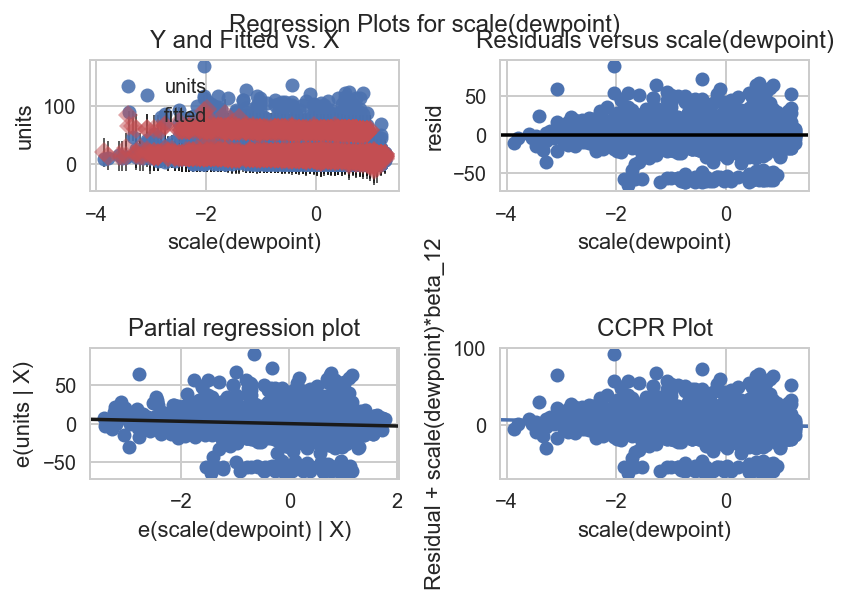

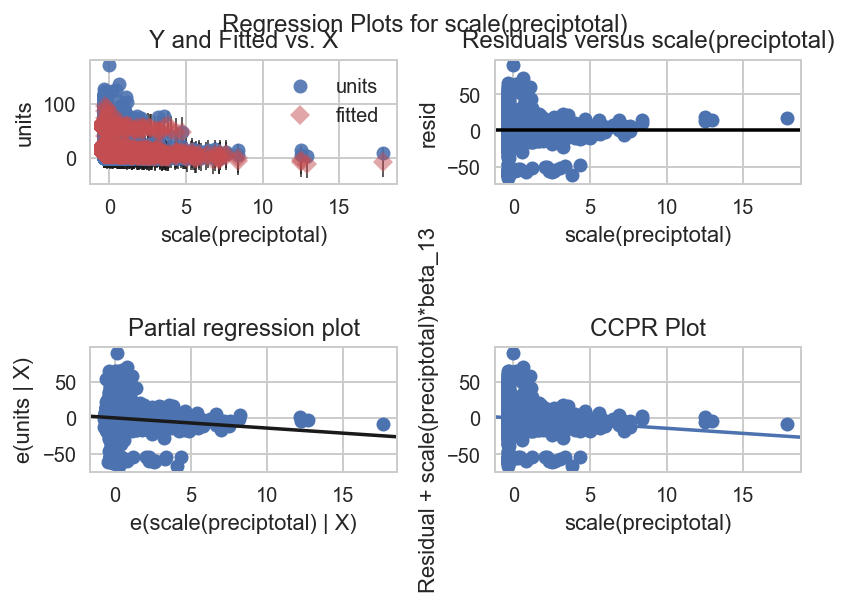

In [55]:
ols_colums =  'scale(dewpoint) + scale(preciptotal)'

ols_colums = ols_colums.split(' + ')

for column in ols_colums:
    fig = sm.graphics.plot_regress_exog(result3, column)
    plt.show()

In [ ]:
plt.scatter(df["x9"], result.resid)
plt.show()